# Evaluacion Unidad 1 
Jhandry Santiago Chimbo Rivera

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Preparacion de datos

In [2]:
# Cargar el dataset
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
# Visualizacion de datos a traves de seaborn
# sns.pairplot(df)


Text(0.5, 1.0, 'Matriz de Correlación')

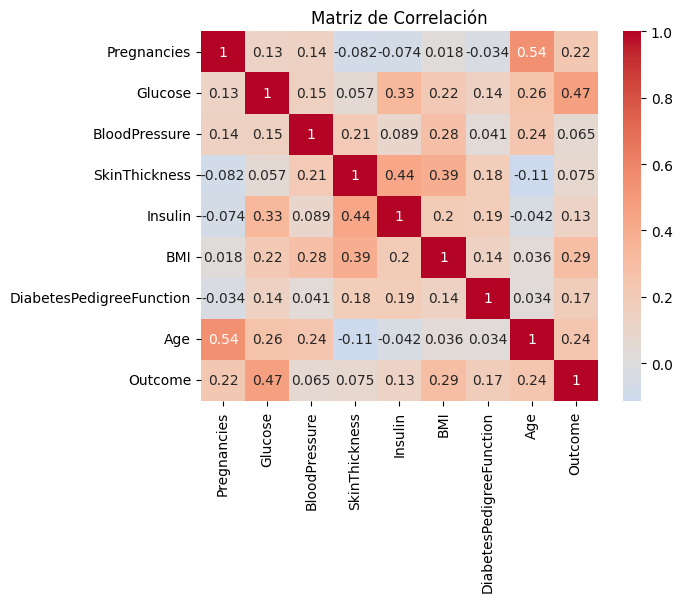

In [5]:
# Matriz de correlacion
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')

In [6]:
# Cargar los datos
x = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].values
y = df['Outcome'].values


# 2. Separacion en conjunto de entrenamiento y prueba

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
#Separar los datos en conjunto de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


## 3. Configuracion del algoritmo

In [9]:
# Regresion Lineal Mulptiple
from sklearn.linear_model import LinearRegression

In [10]:
#Crear el modelo
# Entrenar el modelo
model = LinearRegression()

## 4. Entrenamiento del modelo

In [11]:
model.fit(x_train, y_train)

LinearRegression()

## 5. Prediccion

In [12]:
y_pred = model.predict(x_test)
print(y_pred)

[ 0.32707243  0.24045915  0.15018974  0.19570942  0.47718487  0.46517792
 -0.16592399  0.6601781   0.52888731  0.74625478  0.27228516  0.86862886
  0.3725725   0.36251772  0.09916395  0.43369593  0.18146224  0.0503733
  0.80834469  0.53817263  0.2933902   0.10626366  0.4381232   0.12341812
  0.45893589  0.80892432  0.1471592  -0.03900817  0.28845654  0.1792736
  0.86864698  0.86211429  0.67567349  0.79612938  0.61506248  0.56523772
  1.13551051  0.35903502  0.48084798  0.66391957  0.05991889  0.65275294
  0.58382346  0.28679679 -0.10788092  0.49842839  0.62857636  0.25475053
  0.41970383  1.07242958 -0.01123022  0.59509724  0.68733939  0.31247865
  0.15133417 -0.03301976  0.74986275 -0.32061715  0.42177023  0.68044828
  0.64745986  0.39118369  0.31073209  0.21326571  0.09229236  0.58519584
  0.0197912   0.62487401  0.00751907  0.65162878  0.59668145  0.07109359
  0.25003948  0.16793415  0.09383359  0.54550281  0.2980977   0.2254436
  0.20380601  0.27816034  0.57355934  0.2194713   0.06

## 6. Evaluacion

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
# Verificar el modelo
print(f'Intercepto: {model.intercept_}')
print(f'Coeficientes: {model.coef_}')

Intercepto: -0.9695150943059314
Coeficientes: [ 0.0056454  -0.00224309  0.00060265 -0.00029629  0.01513424  0.10806861
  0.00811192]


In [15]:
# Calcular el error cuadrático medio
print(f'Error cuadrático medio: {mean_squared_error(y_test, y_pred)}')
print(f'R^2: {r2_score(y_test, y_pred)}')

Error cuadrático medio: 0.1806279757179931
R^2: 0.2132648168727409


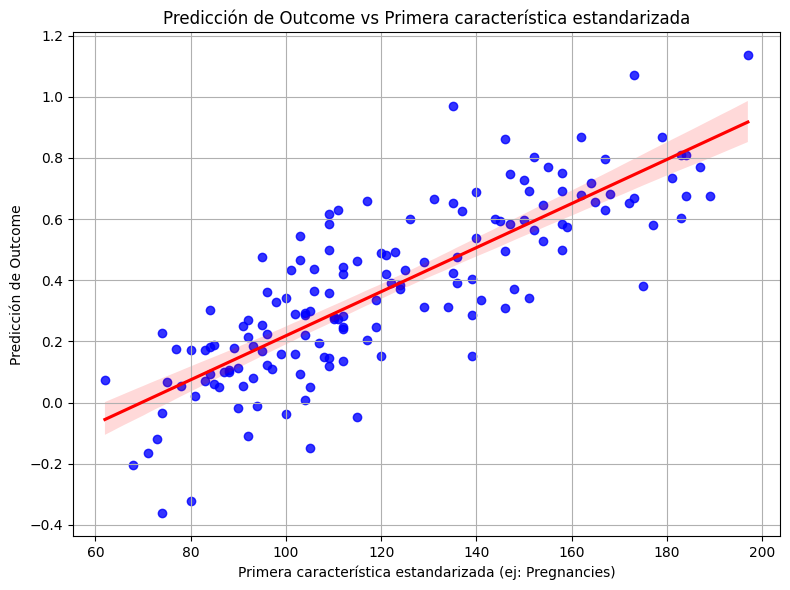

In [18]:
# Graficar los resultados usando solo el valor de Age en x
# Usamos la primera característica para graficar
plt.figure(figsize=(8, 6))
sns.regplot(x=x_test[:, 0], y=y_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Predicción de Outcome vs Primera característica estandarizada")
plt.xlabel("Primera característica estandarizada (ej: Pregnancies)")
plt.ylabel("Predicción de Outcome")
plt.grid(True)
plt.tight_layout()
plt.show()